In [7]:
# File for automating finances
a=1

In [2]:
# Pulling data from google sheets using google cloud and APIs

import gspread
import pandas as pd
import matplotlib as plt
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)

# Display data
data

C:\Users\lohan\AppData\Local\Temp\ipykernel_24424\1285241375.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Timestamp,Expense Amount,Expense Type,Comment,Outlier
0,1/7/2024 16:41:09,23.74,Gas,,
1,1/9/2024 20:41:12,2.13,Leisure,Steam game,
2,1/9/2024 20:42:35,27.06,Restaurant/Fast Food,,
3,1/9/2024 20:43:27,2.99,Leisure,Country map game,
4,1/11/2024 19:46:05,2.76,Restaurant/Fast Food,,
...,...,...,...,...,...
304,1/1/2024 0:00:00,98.06,Miscellaneous/Gifts,"airport uber, batteries, thanks to isaac for t...",
305,1/5/2024 0:00:00,33.75,Utilities Phone,,
306,1/5/2024 0:00:00,104.00,Groceries,,
307,1/5/2024 0:00:00,5.82,Restaurant/Fast Food,,


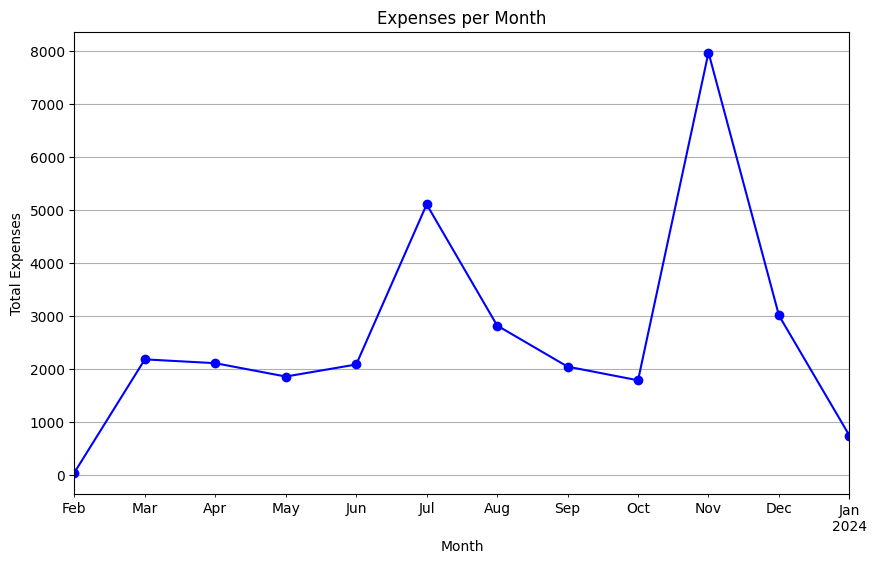

In [8]:
# REGULAR TIME SERIES GRAPH FOR THE EXPENSES PER MONTH

import matplotlib.pyplot as plt

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract month and year from the 'datetime' column
data['month_year'] = data['Timestamp'].dt.to_period('M')

# Group by month and calculate total expenses for each month
monthly_expenses = data.groupby('month_year')['Expense Amount'].sum()

# Plotting the time series graph
plt.figure(figsize=(10, 6))
monthly_expenses.plot(marker='o', linestyle='-', color='b')
plt.title('Expenses per Month')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.grid(True)
plt.show()

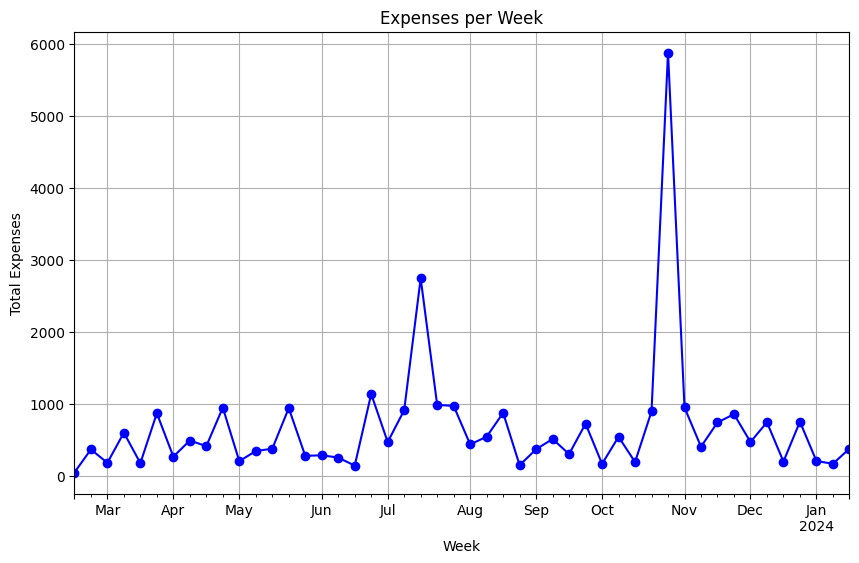

In [17]:
# REGULAR TIME SERIES GRAPH FOR THE EXPENSES PER WEEK

# Convert 'datetime' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract week starting from Monday from the 'datetime' column
data['week_start'] = data['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by week and calculate total expenses for each week
weekly_expenses = data.groupby('week_start')['Expense Amount'].sum()


# Plotting the time series graph
plt.figure(figsize=(10, 6))
weekly_expenses.plot(marker='o', linestyle='-', color='b')
plt.title('Expenses per Week')
plt.xlabel('Week')
plt.ylabel('Total Expenses')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

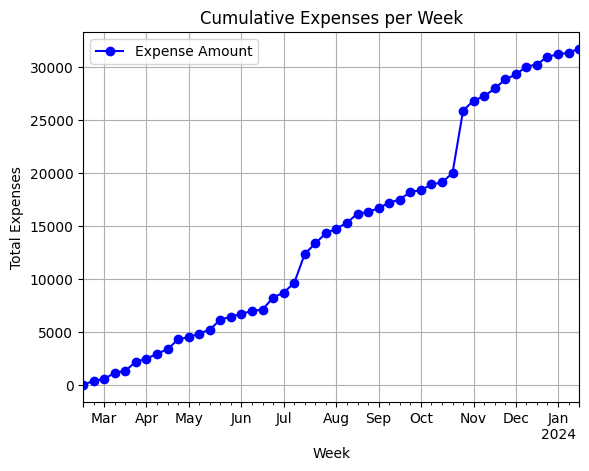

In [43]:
# CUMULATIVE TIME SERIES GRAPH FOR THE EXPENSES PER WEEK


weekly_expenses = data.groupby('week_start')['Expense Amount'].sum()
weekly_expenses_cumulative = weekly_expenses.reset_index()
weekly_expenses_cumulative['Expense Amount'] = weekly_expenses_cumulative['Expense Amount'].cumsum()
weekly_expenses_cumulative.groupby('week_start')
weekly_expenses_cumulative = weekly_expenses_cumulative.groupby('week_start').sum()

plt.figure(figsize=(10, 6))
weekly_expenses_cumulative.plot(marker='o', linestyle='-', color='b')
plt.title('Cumulative Expenses per Week')
plt.xlabel('Week')
plt.ylabel('Total Expenses')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

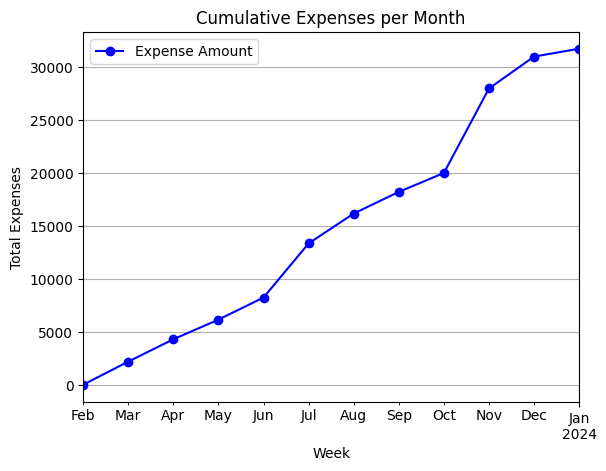

In [46]:
# CUMULATIVE TIME SERIES GRAPH FOR THE EXPENSES PER MONTH

monthly_expenses = data.groupby('month_year')['Expense Amount'].sum()
monthly_expenses_cumulative = monthly_expenses.reset_index()
monthly_expenses_cumulative['Expense Amount'] = monthly_expenses_cumulative['Expense Amount'].cumsum()
monthly_expenses_cumulative.groupby('month_year')
monthly_expenses_cumulative = monthly_expenses_cumulative.groupby('month_year').sum()

plt.figure(figsize=(10, 6))
monthly_expenses_cumulative.plot(marker='o', linestyle='-', color='b')
plt.title('Cumulative Expenses per Month')
plt.xlabel('Week')
plt.ylabel('Total Expenses')
plt.grid(True)
plt.show()

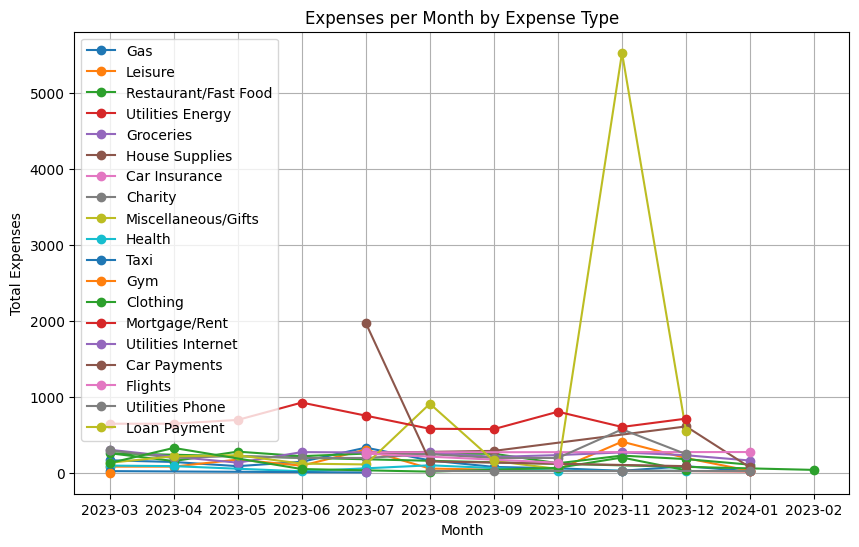

In [56]:



data['Timestamp'] = pd.to_datetime(data['Timestamp'])


data['month_year'] = data['Timestamp'].dt.to_period('M')


plt.figure(figsize=(10, 6))

# Get unique expense types
expense_types = data['Expense Type'].unique()

# Plot each expense type separately
for expense_type in expense_types:
    subset_df = data[data['Expense Type'] == expense_type]
    monthly_expenses = subset_df.groupby('month_year')['Expense Amount'].sum()
    plt.plot(monthly_expenses.index.astype(str), monthly_expenses, marker='o', label=expense_type)

plt.title('Expenses per Month by Expense Type')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# I want to be able to put the name of the expense types (plural) I want to see a graph for
# I want to be able to choose between looking at the numbers in a weekly and monthly basis
# I want to be able to set a date range (start date and a end date)
# I want to be able to look at some statistics. Average 


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##############################
#       User Interface       #
##############################

# What Expense Types would you like to see in the graph?
# Options:  ['All', 'Groceries', 'Restaurant/Fast Food', 'Gas', 'Charity', 'Leisure', 'Health', 'Gym', 'Car Payments', 'Car Insurance', 'Car Maintenance', 'Clothing', 'Miscellaneous/Gifts', 'Mortgage/Rent', 'Utilities Water', 'Utilities Energy', 'Utilities Internet', 'Utilities Gas', 'Flights', 'House Supplies', 'Loss', 'Error Adjustment']
expense_type_list = []

# What Date Range would you like the data to display? ('01/01/2020' format)
start_date = ''
end_date = ''

monthly_or_weekly = 'monthly'


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


##############################
#         Data Import        #
##############################
import gspread
import pandas as pd
import matplotlib as plt
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


##############################
#       Data Processing      #
##############################

# import matplotlib.pyplot as plt



# if monthly_or_weekly = 'monthly':

# elif monthly_or_weekly = 'weekly':

# else:
#     print('You typed the wrong value for "monthly_or_weekly"')








FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json'

In [5]:
# GOLD
##############################
#         Data Import        #
##############################
import gspread
import pandas as pd
import matplotlib as plt
from datetime import datetime, timedelta
import calendar
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('../venv.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)

# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)



In [6]:
# GOLD
# Data processing
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year_Month'] = data['Timestamp'].dt.to_period('M')
data['Year_Week'] = data['Timestamp'].dt.strftime('%Y-%U')


# Getting current week and current month
current_year_week = datetime.now().strftime('%Y-%U')
current_year_month = datetime.now().strftime('%Y-%m')
current_year_week
current_year_month


data_monthly = data
data_weekly = data
data_no_outliers = data

# Set start and end date (This should remove the first and the last month to remove the outliers)
start_date = '2023-03-01'
end_date = '2023-12-31'

data_no_outliers = data_no_outliers[data_no_outliers['Outlier'] != 1]

data_monthly = data_monthly[(data_monthly['Timestamp'] >= start_date) & (data_monthly['Timestamp'] <= end_date)]
#data_weekly = data_weekly[(data_weekly['Timestamp'] >= start_date) & (data_weekly['Timestamp'] <= end_date)]

# remove outliers (car buying and investment loss)
data_monthly = data_monthly[data_monthly['Expense Type'] != 'Loss']
data_monthly = data_monthly[data_monthly['Expense Amount'] != 1972.66]


monthly_average = data_monthly.groupby(by=['Year_Month'])['Expense Amount'].sum()
monthly_average = monthly_average.reset_index()['Expense Amount'].mean()


monthly_spent = data.groupby(by=['Year_Month'])['Expense Amount'].sum().apply(lambda x: '${:,.2f}'.format(x))




#Results




# How much money have I spent this week?
# What are the categories for things I spent this week?


# How much money have I spent this month?
# What are the categories for things I spend this month?

# What is the weekly average spent?
# What is the weekly average spent per category?

# What is the monthly average spent?
# What is the monthly average spent per category?


print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

print('CURRENT EXPENSES\n\n')

###
this_week_spent = data[data['Year_Week'] == current_year_week]['Expense Amount'].sum()

print(f'This week spent so far: ${this_week_spent:,.2f}')

###
data_no_outliers = data_no_outliers[data_no_outliers['Expense Type'] != 'Mortgage/Rent']
data_no_outliers = data_no_outliers[data_no_outliers['Expense Type'] != 'Car Insurance']

weekly_average = data_no_outliers.groupby(['Year_Week'])['Expense Amount'].sum()
weekly_average = weekly_average.reset_index()['Expense Amount'].mean()
weekly_average

print(f'Weekly average (no rent): ${weekly_average:,.2f}')


###
current_date = datetime.now()
if current_date.weekday() == 6:
    days_until_end_of_week = 6
else:
    days_until_end_of_week = 7 - (current_date.weekday() + 2)

print(f'Days until the end of the week: {days_until_end_of_week}\n')

###
this_month_spent = data[data['Year_Month'] == current_year_month]['Expense Amount'].sum()

print(f'This month spent so far: ${this_month_spent:,.2f}')

###
monthly_average = data_monthly.groupby(by=['Year_Month'])['Expense Amount'].sum()
monthly_average = monthly_average.reset_index()['Expense Amount'].mean()

print(f'Monthly average: ${monthly_average:,.2f}')


###
last_day_of_month = calendar.monthrange(current_date.year, current_date.month)[1]
days_until_end_of_month = last_day_of_month - current_date.day

print(f'Days until the end of the month: {days_until_end_of_month}\n\n')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

print('TOTAL EXPENSES\n\n')

###
total_spent = data['Expense Amount'].sum()

print(f'Spent from February, 2023 - Today: ${total_spent:,.2f}\n')

###
total_spent_per_category = data.groupby(by=['Expense Type'])['Expense Amount'].sum()
total_spent_per_category = total_spent_per_category.reset_index()
total_spent_per_category['sum'] = total_spent_per_category['Expense Amount'].sum()
total_spent_per_category['Percentage of Total Expenses'] = total_spent_per_category['Expense Amount']/total_spent_per_category['sum']
total_spent_per_category = total_spent_per_category[['Expense Type', 'Expense Amount', 'Percentage of Total Expenses']]
total_spent_per_category['Expense Amount'] = total_spent_per_category['Expense Amount'].map('${:,.2f}'.format)
total_spent_per_category['Percentage of Total Expenses'] = total_spent_per_category['Percentage of Total Expenses'].map('{:.2%}'.format)

print(f'Total Expenses per category:\n\n {total_spent_per_category.reset_index()}\n\n')




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


CURRENT EXPENSES


This week spent so far: $411.88
Weekly average (no rent): $330.94
Days until the end of the week: 1

This month spent so far: $600.83
Monthly average: $2,280.12
Days until the end of the month: 16


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


TOTAL EXPENSES


Spent from February, 2023 - Today: $34,385.94

Total Expenses per category:

     index          Expense Type Expense Amount Percentage of Total Expenses
0       0         Car Insurance        $551.88                        1.60%
1       1          Car Payments      $2,219.42                        6.45%
2       2               Charity      $3,445.74                       10.02%
3       3              Chat GPT         $20.00                        0.06%
4       4              Clothing        $851.92                        2.48%
5       5               Flights        $394.26                        1.15%
6       6                   Gas      $1,417.67                   

In [90]:
# GOLD
##############################
#         Data Import        #
##############################
import gspread
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import calendar
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('../venv.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expense Types'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
expense_type = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
expense_type = pd.DataFrame(expense_type)

# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)

# Data processing
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year_Month'] = data['Timestamp'].dt.to_period('M')
data['Year_Week'] = data['Timestamp'].dt.strftime('%Y-%U')



# Table for graphing 

weekly_est_ideal = pd.DataFrame(data['Year_Week'].unique()).sort_values(by=[0]).rename(columns={0: 'Year_Week'})
weekly_est_ideal['Estimated Weekly'] = expense_type['Estimated Weekly Amount'].sum()
weekly_est_ideal['Ideal Weekly'] = expense_type['Ideal Weekly Amount'].sum()
weekly_est_ideal.loc[weekly_est_ideal['Year_Week'] == '2023-08', ['Estimated Weekly', 'Ideal Weekly']] = 0 #fixing the fact that the first row is wrong
weekly_est_ideal['Cumulative Estimated Weekly'] = weekly_est_ideal['Estimated Weekly'].cumsum()
weekly_est_ideal['Cumulative Ideal Weekly'] = weekly_est_ideal['Ideal Weekly'].cumsum()

weekly_actual = data.groupby(['Year_Week'])['Expense Amount'].sum().reset_index().rename(columns={'Expense Amount': 'Actual Weekly'})
weekly_est_ideal_actual = pd.merge(weekly_actual, weekly_est_ideal, how='inner', on='Year_Week')
weekly_est_ideal_actual['Cumulative Actual Weekly'] = weekly_est_ideal_actual['Actual Weekly'].cumsum()
weekly_est_ideal_actual

weekly_est_ideal_actual['Date_Week'] = pd.to_datetime(weekly_est_ideal_actual['Year_Week'] + '-5', format='%Y-%U-%w')

weekly_est_ideal_actual

,Year_Week,Actual Weekly,Estimated Weekly,Ideal Weekly,Cumulative Estimated Weekly,Cumulative Ideal Weekly,Cumulative Actual Weekly,Date_Week
0,2023-08,42.86,0.00,0.00,0.00,0.00,42.86,2023-02-24
1,2023-09,363.54,747.59,590.09,747.59,590.09,406.40,2023-03-03
2,2023-10,177.77,747.59,590.09,1495.18,1180.18,584.17,2023-03-10
3,2023-11,596.42,747.59,590.09,2242.77,1770.27,1180.59,2023-03-17
4,2023-12,173.14,747.59,590.09,2990.36,2360.36,1353.73,2023-03-24
5,2023-13,865.73,747.59,590.09,3737.95,2950.45,2219.46,2023-03-31
6,2023-14,263.26,747.59,590.09,4485.54,3540.54,2482.72,2023-04-07
7,2023-15,487.28,747.59,590.09,5233.13,4130.63,2970.00,2023-04-14
8,2023-16,409.31,747.59,590.09,5980.72,4720.72,3379.31,2023-04-21
9,2023-17,944.69,747.59,590.09,6728.31,5310.81,4324.00,2023-04-28


In [91]:
##############################
#         Data Import        #
##############################
import gspread
import pandas as pd
import matplotlib as plt
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Income'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
income = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
income = pd.DataFrame(income)


# Data processing
income['Date'] = pd.to_datetime(income['Date'])
income['Year_Month'] = income['Date'].dt.to_period('M')
income['Year_Week'] = income['Date'].dt.strftime('%Y-%U')
income

,Date,Amount Received,Category,Year_Month,Year_Week
0,2023-02-24,28.92,Adjustment,2023-02,2023-08
1,2023-03-24,142.00,Adjustment,2023-03,2023-12
2,2023-10-13,50.76,Adjustment,2023-10,2023-41
3,2023-11-03,64.50,Adjustment,2023-11,2023-44
4,2024-01-12,1192.88,Adjustment,2024-01,2024-01
5,2023-07-14,364.00,Adjustment,2023-07,2023-28
6,2023-03-03,2009.53,Salary,2023-03,2023-09
7,2023-03-17,1897.94,Salary,2023-03,2023-11
8,2023-03-31,1897.94,Salary,2023-03,2023-13
9,2023-04-14,1897.94,Salary,2023-04,2023-15


In [ ]:
income['Date_Week'] = pd.to_datetime(income['Year_Week'] + '-5', format='%Y-%U-%w')

weekly_income = income.groupby(by=['Date_Week'])['Amount Received'].sum().reset_index()


weekly_income_n_expenses = pd.merge(weekly_income, weekly_est_ideal_actual, how='outer', on='Date_Week')
weekly_income_n_expenses['Income Received'] = weekly_income_n_expenses['Amount Received'].fillna(0)
weekly_income_n_expenses['Cumulative Income'] = weekly_income_n_expenses['Income Received'].cumsum()
weekly_income_n_expenses['Actual Capital'] = weekly_income_n_expenses['Cumulative Income'] - weekly_income_n_expenses['Cumulative Actual Weekly']
weekly_income_n_expenses['Estimated Capital'] = weekly_income_n_expenses['Cumulative Income'] - weekly_income_n_expenses['Cumulative Estimated Weekly']
weekly_income_n_expenses['Ideal Capital'] = weekly_income_n_expenses['Cumulative Income'] - weekly_income_n_expenses['Cumulative Ideal Weekly']
weekly_income_n_expenses

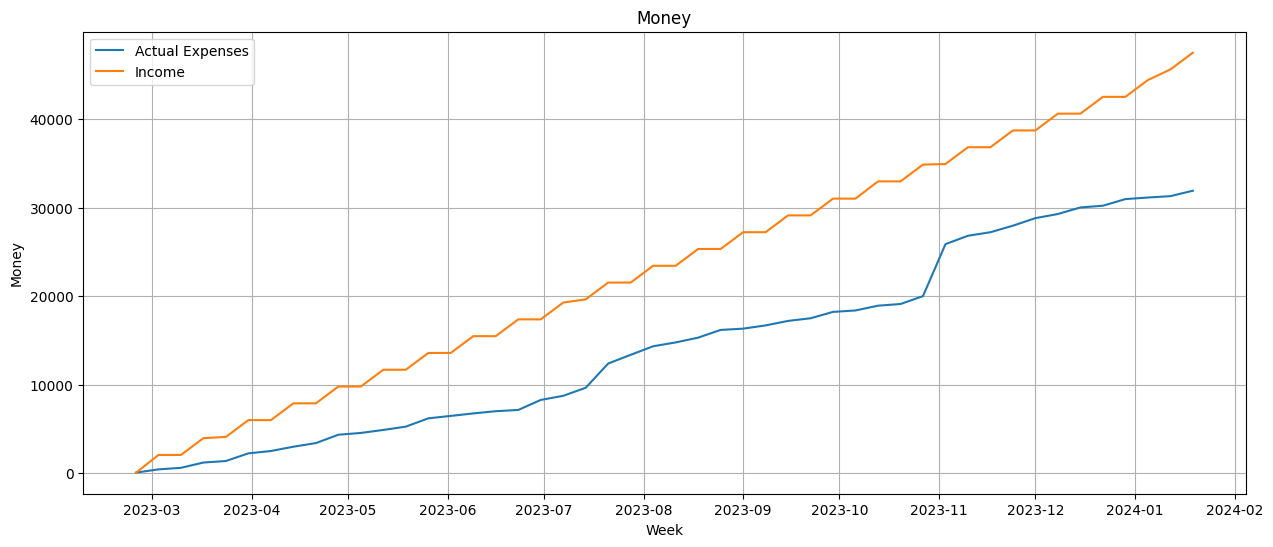

In [95]:
# ALL LINES THAT I WANT
import matplotlib.pyplot  as plt

plt.figure(figsize=(15, 6))

#plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Cumulative Estimated Weekly'], label='Estimated Expenses')
#plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Cumulative Ideal Weekly'], label='Ideal Expenses')

# plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Estimated Capital'], label='Estimate Capital')
# plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Ideal Capital'], label='Ideal Capital')
# plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Actual Capital'], label='Capital')

plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Cumulative Actual Weekly'], label='Actual Expenses')
plt.plot(weekly_income_n_expenses['Date_Week'], weekly_income_n_expenses['Cumulative Income'], label='Income')

plt.xlabel('Week')
plt.ylabel('Money') 
plt.title('Money')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
weekly_income_n_expenses[['Cumulative Actual Weekly', 'Cumulative Income', 'Actual Capital']]


,Cumulative Actual Weekly,Cumulative Income,Actual Capital
0,42.86,28.92,-13.94
1,406.40,2038.45,1632.05
2,584.17,2038.45,1454.28
3,1180.59,3936.39,2755.80
4,1353.73,4078.39,2724.66
5,2219.46,5976.33,3756.87
6,2482.72,5976.33,3493.61
7,2970.00,7874.27,4904.27
8,3379.31,7874.27,4494.96
9,4324.00,9772.21,5448.21


In [73]:
# TOTALS
total_spent = data['Expense Amount'].sum()

print(f'Spent from February, 2023 - Today: ${total_spent:,.2f}')

total_earned = income['Amount Received'].sum()

print(f'Earned from February, 2023 - Today: ${total_earned:,.2f}\n')

print(f'Capital: ${total_earned-total_spent:,.2f} (401k not included)')

#31907.27	47505.21	15597.94

Spent from February, 2023 - Today: $31,907.27
Earned from February, 2023 - Today: $47,505.21

Capital: $15,597.94 (401k not included)


In [29]:
weekly_est_ideal_actual['Actual Weekly'].sum()



31907.27

In [ ]:
# GOLD
##############################
#         Data Import        #
##############################
import gspread
import pandas as pd
import matplotlib as plt
from datetime import datetime, timedelta
import calendar
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('../venv.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expense Types'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
expense_type = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
expense_type = pd.DataFrame(expense_type)
expense_type

In [55]:

# a['b'] = data.groupby(['Year_Month'])['Expense Amount'].sum()
# a
weekly_actual = data.groupby(['Year_Week'])['Expense Amount'].sum().reset_index()
weekly_est_ideal_actual = pd.merge(a, weekly_est_ideal_actual, how='inner', on='Year_Week')

,Year_Week,Expense Amount,Estimated Weekly,Ideal Weekly,Cumulative Estimated Weekly,Cumulative Ideal Weekly
0,2023-08,42.86,747.59,590.09,747.59,590.09
1,2023-09,363.54,747.59,590.09,1495.18,1180.18
2,2023-10,177.77,747.59,590.09,2242.77,1770.27
3,2023-11,596.42,747.59,590.09,2990.36,2360.36
4,2023-12,173.14,747.59,590.09,3737.95,2950.45
5,2023-13,865.73,747.59,590.09,4485.54,3540.54
6,2023-14,263.26,747.59,590.09,5233.13,4130.63
7,2023-15,487.28,747.59,590.09,5980.72,4720.72
8,2023-16,409.31,747.59,590.09,6728.31,5310.81
9,2023-17,944.69,747.59,590.09,7475.90,5900.90


In [147]:
# Show significant difference in gas expense before and after having a hybrid car
# Hybrid car bought in end of July (2023-07)
gas = data[data['Expense Type'] == 'Gas']
gas.groupby(['Year_Month'])['Expense Amount'].sum()

Year_Month
2023-03    169.07
2023-04    147.00
2023-05     91.92
2023-06    149.80
2023-07    335.62
2023-08    167.47
2023-09     82.08
2023-10     64.03
2023-11     30.92
2023-12     91.49
2024-01     23.74
Freq: M, Name: Expense Amount, dtype: float64

In [148]:
data.groupby(['Year_Month'])['Expense Amount'].sum()

Year_Month
2023-02      42.86
2023-03    2176.60
2023-04    2104.54
2023-05    1852.65
2023-06    2079.94
2023-07    5098.66
2023-08    2814.46
2023-09    2039.43
2023-10    1781.84
2023-11    7962.66
2023-12    3004.98
2024-01     948.65
Freq: M, Name: Expense Amount, dtype: float64

In [118]:
weekly_average = data_no_outliers.groupby(['Year_Week'])['Expense Amount'].sum()
weekly_average = weekly_average.reset_index()['Expense Amount'].mean()
weekly_average
#data_no_outliers[data_no_outliers['Year_Week'] == '2023-26']

496.03229166666665

In [114]:
a = data[data['Expense Type'] == 'Gas']
a.groupby(['Year_Month'])['Expense Amount'].sum()

Year_Month
2023-03    169.07
2023-04    147.00
2023-05     91.92
2023-06    149.80
2023-07    335.62
2023-08    167.47
2023-09     82.08
2023-10     64.03
2023-11     30.92
2023-12     91.49
2024-01     23.74
Freq: M, Name: Expense Amount, dtype: float64